
# Clustering: Application to Fashion MNIST

In this example, we will use two clustering techniques to explore a unknown dataset: Fashion MNIST.

The idea is to consider the Fashion MNIST dataset and to classify its content in an unsupervised manner. The resulting clusters are then compared to the 10 known classes of datatset.


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from imageio import imwrite
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
import random
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from PIL import Image, ImageChops
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans


## A quick look to the dataset

The full description of this datset is available following the URL:
https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/


The number of images = 10000
The number of classes = 10


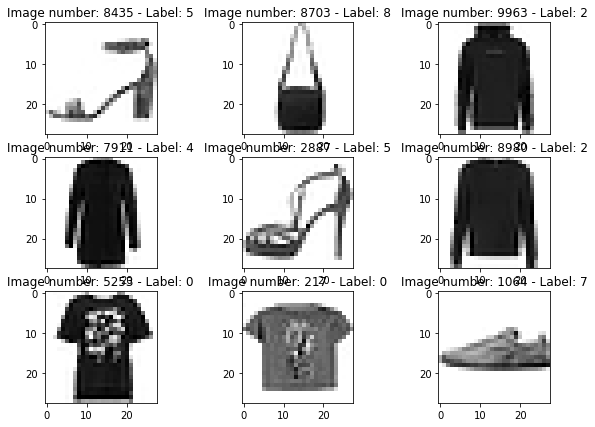

In [ ]:

Xn = X.values
yn = y.values

number_images = Xn.shape[0]
number_classes = np.unique(yn).size # Other solution : yn.max()+1

print('The number of images = {}'.format(number_images))
print('The number of classes = {}'.format(number_classes))

j = 1
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
for i in range(9):
    cur = np.random.randint(number_images)
    fig.add_subplot(3,3,j)
    plt.imshow(Xn[cur].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title('Image number: {} - Label: {}'.format(cur, yn[cur,0]))
    #plt.colorbar()
    j=j+1

plt.show()



## Preprocessing the dataset using PCA

Now that we know very well PCA and it's ability to reduce the dimension of the data while preserving most of the information, we first pre-process the dataset so that we get rid of useless dimensions.

- Apply PCA on data stored in X and keep 90% of expressed variance.
- Transform the data X using the computed PCA and store the result in X_r.
- Print the original dimension of the dataset.
- Print the dimension of the dataset after PCA.

The result of applying PCA on Fashion MNIST : Each principal component is a apotentially interpretable picture of what each vector is finding.

- For each of the 4 first components, print the corresponding "explained variance ratio".

Original dimension of the dataset (before PCA)  =  (10000, 784)
Number of dimensions after PCA (0.90) =  (10000, 82)


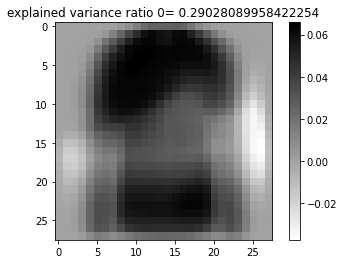

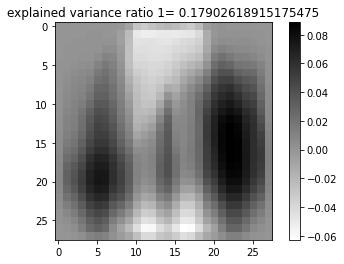

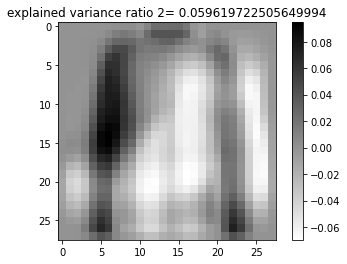

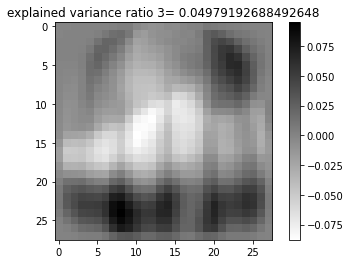

In [ ]:

pca = PCA(0.90)
Xn_r = pca.fit(Xn).transform(Xn)

print("Original dimension of the dataset (before PCA)  = " , Xn.shape)
print("Number of dimensions after PCA (0.90) = " , Xn_r.shape)

for i in range (4):
    plt.title("explained variance ratio {}= {}" .format(i,pca.explained_variance_ratio_[i]))
    plt.imshow(pca.components_[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.colorbar()
    plt.show()


After observing the obtained images, we notice that the first two principal components are clearly distinguishable, each representing a distinct type of clothing. They also have the highest variance (29.03% and 17.90%, respectively), meaning they carry the maximum amount of information. In other words, this represents a reduction from 784 dimensions to 82 dimensions.


## K-Means

Let's first apply k-means on the PCA transformed vectors of the dataset.
The target number of k-means centroids = 1000.

Print the number of obtained clusters and store this value in "nb_clusts".



In [ ]:
from sklearn.cluster import KMeans
target_nb_clusts = 1000


k_means = KMeans(target_nb_clusts,random_state=0)
k_means.fit(Xn_r)

nb_clusts =k_means.cluster_centers_.shape[0]
print("The numbers of k-means resulting clusters is ", nb_clusts)

The numbers of k-means resulting clusters is  1000


### Before going further, let's study the properties of our clusters

The first thing to do is to create **nb_clusts** lists named **cluster_index**, where:
- **cluster_index[i]** contains the indices from **X** of vectors that belong to cluster # **i**.

In [ ]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)


In order to assess the quality of produced clusters, here we will visualize the content of few clusters.

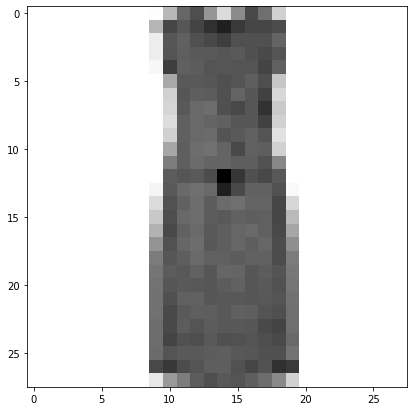

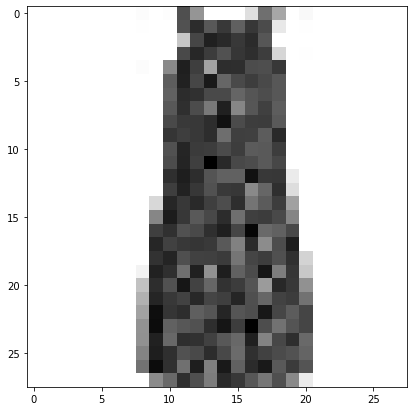

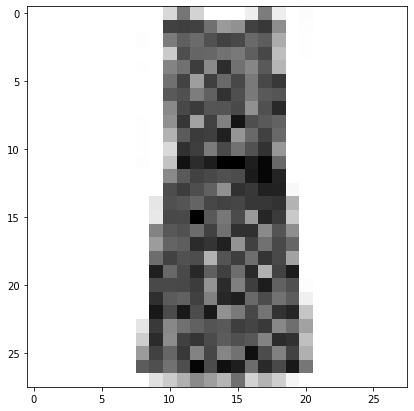

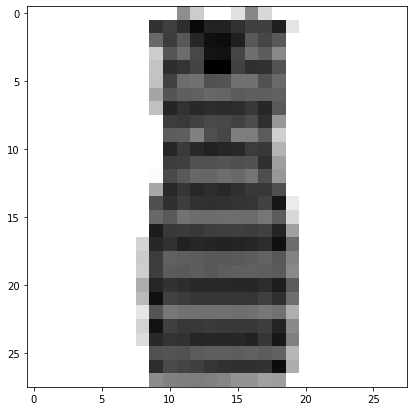

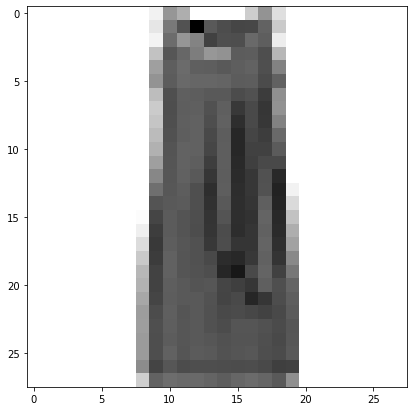

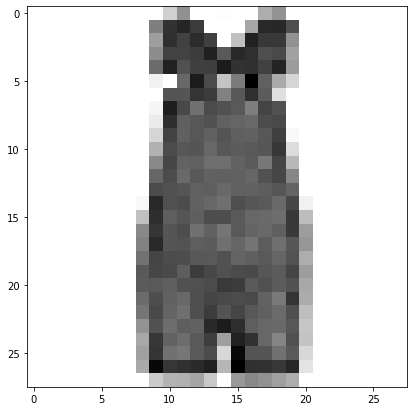

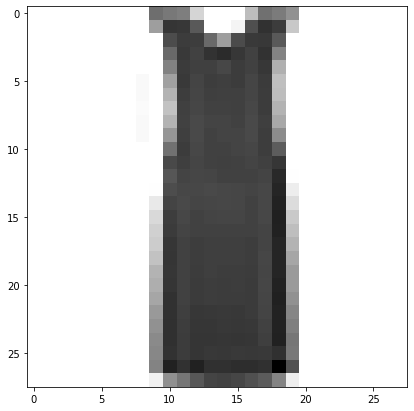

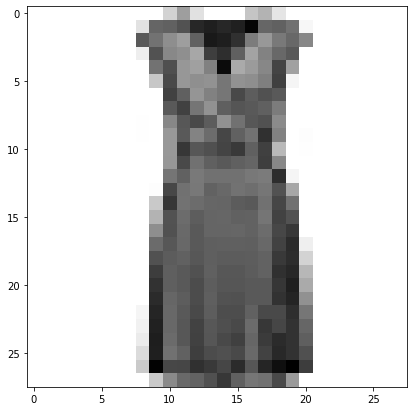

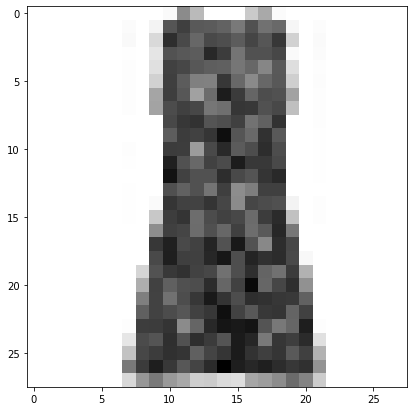

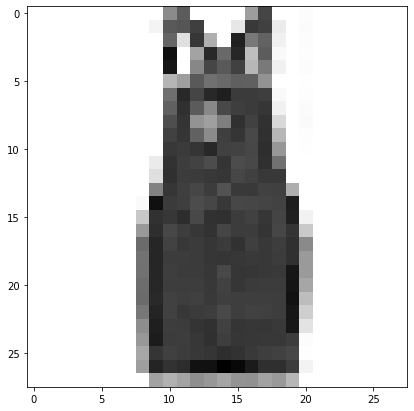

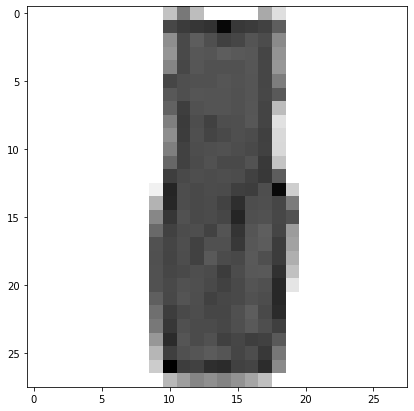

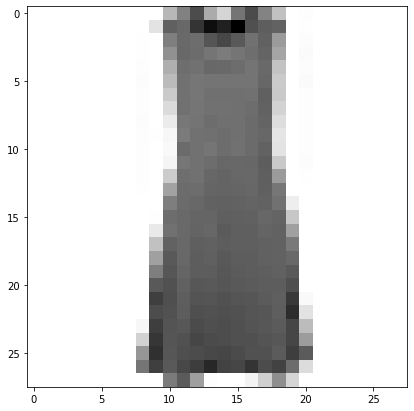

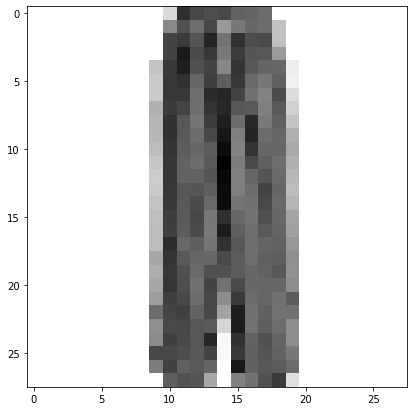

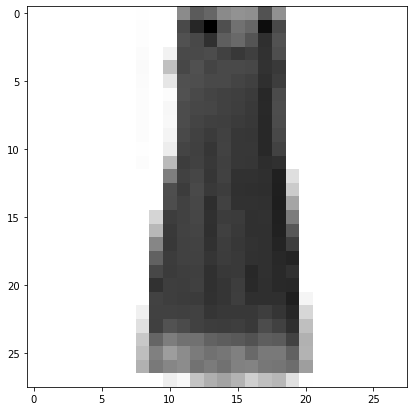

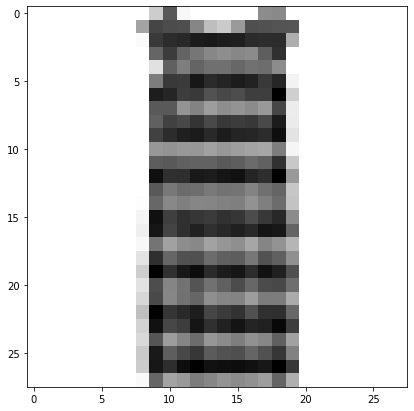

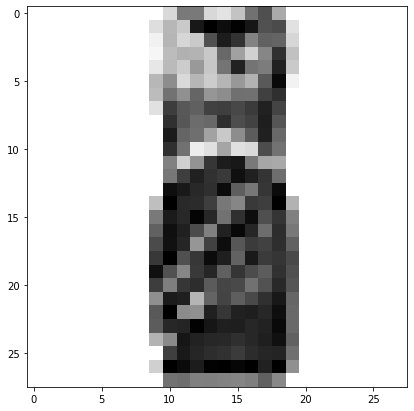

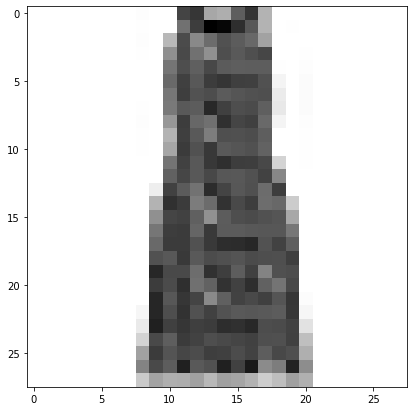

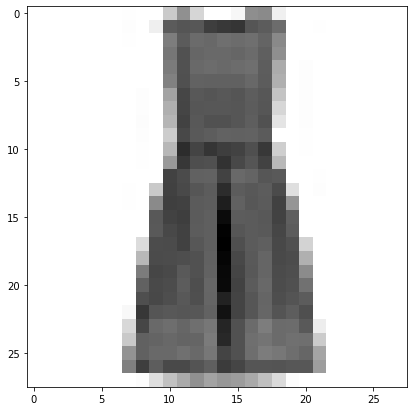

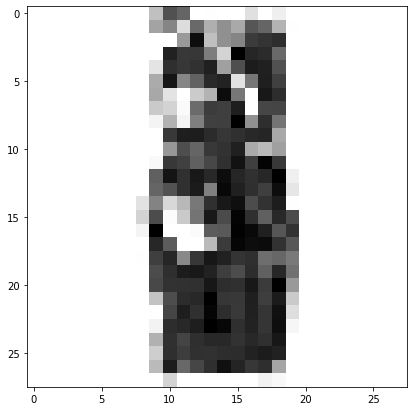

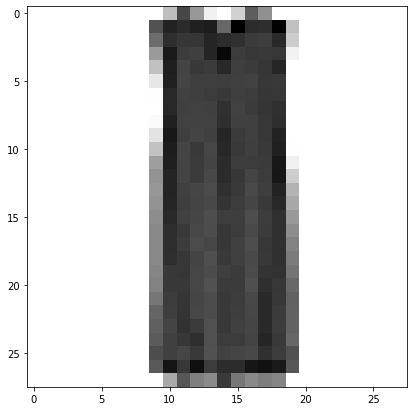

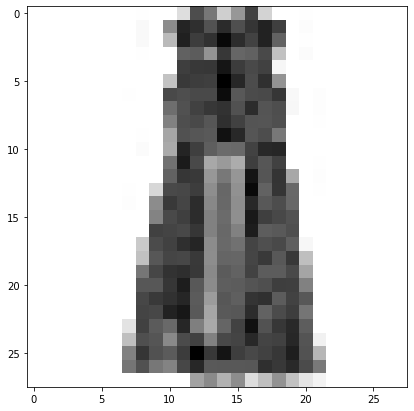

21


In [ ]:


clust = 2 # ID of cluster to visualize

clusterI = cluster_index[clust]
for i in clusterI:
  fig = plt.figure();
  fig.set_figheight(7)
  fig.set_figwidth(10)
  plt.imshow(Xn[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
  plt.show()
print(len(clusterI))



We can even plot the histogram of the class labels of vectors contained in the cluster.

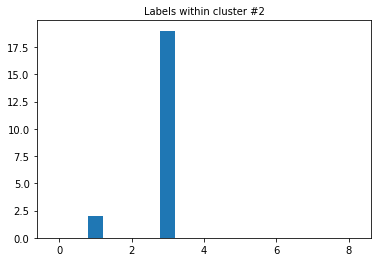

In [ ]:
s= len(clusterI)
clusterL= np.zeros(s)
for i in range(s):
  clusterL[i]= yn[clusterI[i]]

# Create and fill an array "clusterL" with the labels of images belonging to a cluster

plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)

plt.show()


## Result analysis :
Here, we notice that our images belong to two different classes (Class: Dress, Pants). Therefore, the clustering is not perfect, as there are two images that do not represent the Dress class (these two images look similar to a dress). This is due to the initial conditions (the choice of centroids and the number of clusters).

#Kmeans without PCA

The numbers of k-means resulting clusters is  1000
2


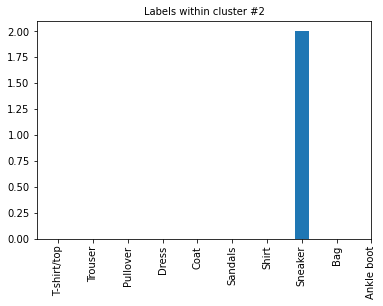

In [ ]:
target_nb_clusts = 1000
k_means2 = KMeans(target_nb_clusts,random_state=0)
k_means2.fit(Xn)

nb_clusts2 =k_means2.cluster_centers_.shape[0]
print("The numbers of k-means resulting clusters is ", nb_clusts2)
#2D matrix  for an array of indexes of the given label
cluster_index2= [[] for j in range(nb_clusts2)]

for i in range(Xn.shape[0]):
    for j in range(nb_clusts2):
        if k_means2.labels_[i] == j:
            cluster_index2[j].append(i)

clust = 2 # ID of cluster to visualize

clusterI2 = cluster_index2[clust] .

print(len(clusterI2))
s= len(clusterI2)

clusterL2= np.zeros(s)

for i in range(s):
  clusterL2[i]= yn[clusterI2[i]]

# Create and fill an array "clusterL" with the labels of images belonging to a cluster
plt.hist(clusterL2, bins=range(10), rwidth=0.4, align='left')
plt.title('Labels within cluster #{}'.format(clust), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')
plt.xticks(np.arange(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.show()

#With PCA k=10

The numbers of k-means resulting clusters is  10


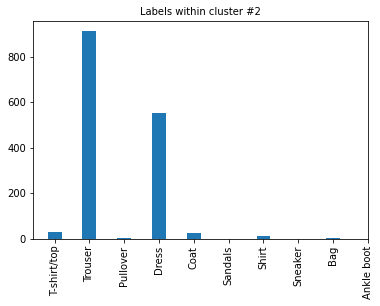

In [ ]:

target_nb_clusts2 = 10

k_means3 = KMeans(target_nb_clusts2,random_state=0)
k_means3.fit(Xn_r)

nb_clusts3 =k_means3.cluster_centers_.shape[0]
print("The numbers of k-means resulting clusters is ", nb_clusts3)
#2D matrix  for an array of indexes of the given label
cluster_index3= [[] for j in range(nb_clusts3)]

for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts3):
        if k_means3.labels_[i] == j:
            cluster_index3[j].append(i)
clust = 2 # ID of cluster to visualize

clusterI3 = cluster_index3[clust]

s= len(clusterI3)
clusterL3= np.zeros(s)
for i in range(s):
  clusterL3[i]= yn[clusterI3[i]]

# Create and fill an array "clusterL" with the labels of images belonging to a cluster

plt.hist(clusterL3, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')
plt.xticks(np.arange(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])

plt.show()


#Without PCA k=10

The numbers of k-means resulting clusters is  1000


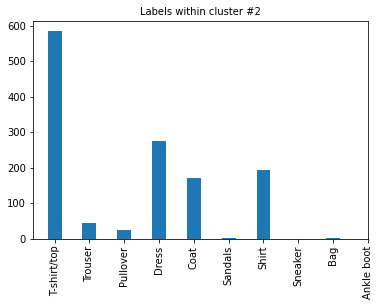

In [ ]:
from sklearn.cluster import KMeans
target_nb_clusts = 10


k_means2 = KMeans(target_nb_clusts,random_state=0)
k_means2.fit(Xn)

nb_clusts2 =k_means2.cluster_centers_.shape[0]
print("The numbers of k-means resulting clusters is ", nb_clusts)
#2D matrix  for an array of indexes of the given label
cluster_index2= [[] for j in range(nb_clusts2)]

for i in range(Xn.shape[0]):
    for j in range(nb_clusts2):
        if k_means2.labels_[i] == j:
            cluster_index2[j].append(i)
clust = 2 # ID of cluster to visualize

clusterI2 = cluster_index2[clust]

s= len(clusterI2)
clusterL2= np.zeros(s)
for i in range(s):
  clusterL2[i]= yn[clusterI2[i]]

# Create and fill an array "clusterL" with the labels of images belonging to a cluster

plt.hist(clusterL2, bins=range(10), rwidth=0.4, align='left')

plt.title('Labels within cluster #{}'.format(clust), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')
plt.xticks(np.arange(10), ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot'])
plt.show()